<a href="https://colab.research.google.com/github/Krishan-Kumar-kk/Regression_problems_ML/blob/main/Black_frilday_sales_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
train_df=pd.read_csv('/content/train.csv')
test_df=pd.read_csv("/content/test.csv")

In [ ]:
train_df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


In [ ]:
test_df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...
233594,1006036,P00118942,F,26-35,15,B,4+,1,8,NaN,NaN
233595,1006036,P00254642,F,26-35,15,B,4+,1,5,8.0,NaN
233596,1006036,P00031842,F,26-35,15,B,4+,1,1,5.0,12.0
233597,1006037,P00124742,F,46-50,1,C,4+,0,10,16.0,NaN


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [ ]:
train=train_df.copy()        #coping data into another datafrom 
test=test_df.copy()

In [ ]:
train.drop(['User_ID','Product_ID'],axis=1,inplace=True)  
test.drop(['User_ID','Product_ID'],axis=1,inplace=True)   

drop 'User_ID'and 'Product_ID' because they do not affect our analysis.

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      550068 non-null  object 
 1   Age                         550068 non-null  object 
 2   Occupation                  550068 non-null  int64  
 3   City_Category               550068 non-null  object 
 4   Stay_In_Current_City_Years  550068 non-null  object 
 5   Marital_Status              550068 non-null  int64  
 6   Product_Category_1          550068 non-null  int64  
 7   Product_Category_2          376430 non-null  float64
 8   Product_Category_3          166821 non-null  float64
 9   Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 42.0+ MB


In [ ]:
train.describe(include='all')

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,550068,550068,550068.000000,550068,550068,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
unique,2,7,NaN,3,5,NaN,NaN,NaN,NaN,NaN
top,M,26-35,NaN,B,1,NaN,NaN,NaN,NaN,NaN
freq,414259,219587,NaN,231173,193821,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,8.076707,NaN,NaN,0.409653,5.404270,9.842329,12.668243,9263.968713
std,NaN,NaN,6.522660,NaN,NaN,0.491770,3.936211,5.086590,4.125338,5023.065394
min,NaN,NaN,0.000000,NaN,NaN,0.000000,1.000000,2.000000,3.000000,12.000000
25%,NaN,NaN,2.000000,NaN,NaN,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,NaN,NaN,7.000000,NaN,NaN,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,NaN,NaN,14.000000,NaN,NaN,1.000000,8.000000,15.000000,16.000000,12054.000000


In [ ]:
import sklearn
from sklearn.impute import SimpleImputer 
imputer= SimpleImputer(missing_values=np.nan,strategy='mean' )
imputer=imputer.fit(train.iloc[:,7:9])
train.iloc[:,7:9]=imputer.transform(train.iloc[:,7:9])
test.iloc[:,7:9]=imputer.transform(test.iloc[:,7:9])
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      550068 non-null  object 
 1   Age                         550068 non-null  object 
 2   Occupation                  550068 non-null  int64  
 3   City_Category               550068 non-null  object 
 4   Stay_In_Current_City_Years  550068 non-null  object 
 5   Marital_Status              550068 non-null  int64  
 6   Product_Category_1          550068 non-null  int64  
 7   Product_Category_2          550068 non-null  float64
 8   Product_Category_3          550068 non-null  float64
 9   Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 42.0+ MB


So, the available datatypes are : int64, float64 and objects. We will leave the numeric datatypes alone and focus on object datatypes as the cannot be directly put into a Machine Learning Model

**Let's get Gender first.**

In [ ]:
train.Gender.unique()

array(['F', 'M'], dtype=object)

In [ ]:
def map_gender(gender):
  if gender=='M':
    return 1
  else:
    return 0

In [ ]:
train['Gender']=train['Gender'].apply(map_gender)
test['Gender']=test['Gender'].apply(map_gender)

**convert age range into another variable**

In [ ]:
train.Age.unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [ ]:
def map_age(Age):
  if  Age=='0-17':
    return 0
  elif Age=='18-25':
    return 1
  elif Age=='26-35':
    return 2
  elif Age=='36-45':
    return 3
  elif Age=='46-50':
    return 4
  elif Age=='51-55':
    return 5
  else:
    return 6

train['Age']=train['Age'].apply(map_age)
test['Age']=test['Age'].apply(map_age)

change the category of city_category in dumiess variable

In [ ]:
train.City_Category.unique()

array(['A', 'C', 'B'], dtype=object)

In [ ]:
def map_city_categories(city_category):
    if city_category == 'A':
        return 2
    elif city_category == 'B':
        return 1
    else:
        return 0
train['City_Category']=train['City_Category'].apply(map_city_categories)
test['City_Category']=test['City_Category'].apply(map_city_categories)

In [ ]:
test.Stay_In_Current_City_Years.unique()

array(['2', '0', '4+', '1', '3'], dtype=object)

In [ ]:
train['Stay_In_Current_City_Years']=train['Stay_In_Current_City_Years'].replace('4+','4')
test['Stay_In_Current_City_Years']=test['Stay_In_Current_City_Years'].replace('4+','4')

In [ ]:
train.Stay_In_Current_City_Years.unique()

array(['2', '4', '3', '1', '0'], dtype=object)

In [ ]:
test.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1,4,7,1,2,1,1,11.0,12.668243
1,1,2,17,0,0,0,3,5.0,12.668243
2,0,3,1,1,4,1,5,14.0,12.668243
3,0,3,1,1,4,1,4,9.0,12.668243
4,0,2,1,0,1,0,4,5.0,12.000000


In [ ]:
train.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,0,10,2,2,0,3,9.842329,12.668243,8370
1,0,0,10,2,2,0,1,6.000000,14.000000,15200
2,0,0,10,2,2,0,12,9.842329,12.668243,1422
3,0,0,10,2,2,0,12,14.000000,12.668243,1057
4,1,6,16,0,4,0,8,9.842329,12.668243,7969


# EDA

**univariant analysis**

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


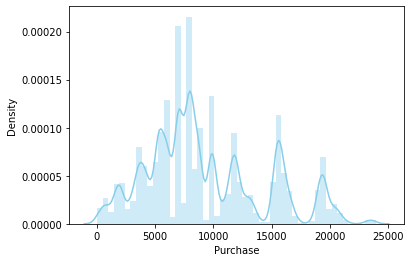

In [ ]:
sns.distplot( train["Purchase"] , color="skyblue", label="Sale")


in purchase column the **mean > median**  so data is right skewed 

In [ ]:
train["Purchase"]=np.log(train['Purchase'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


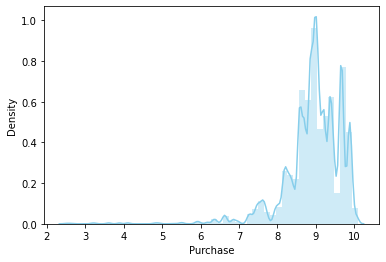

In [ ]:
sns.distplot( train["Purchase"] , color="skyblue", label="Sale")

In [ ]:
 train["Purchase"].mean()

8.939353690990398

In [ ]:
 train["Purchase"].median()  

8.993054630146133

# New section

After taking log now mode and median are nearly equal and data is normly distributed

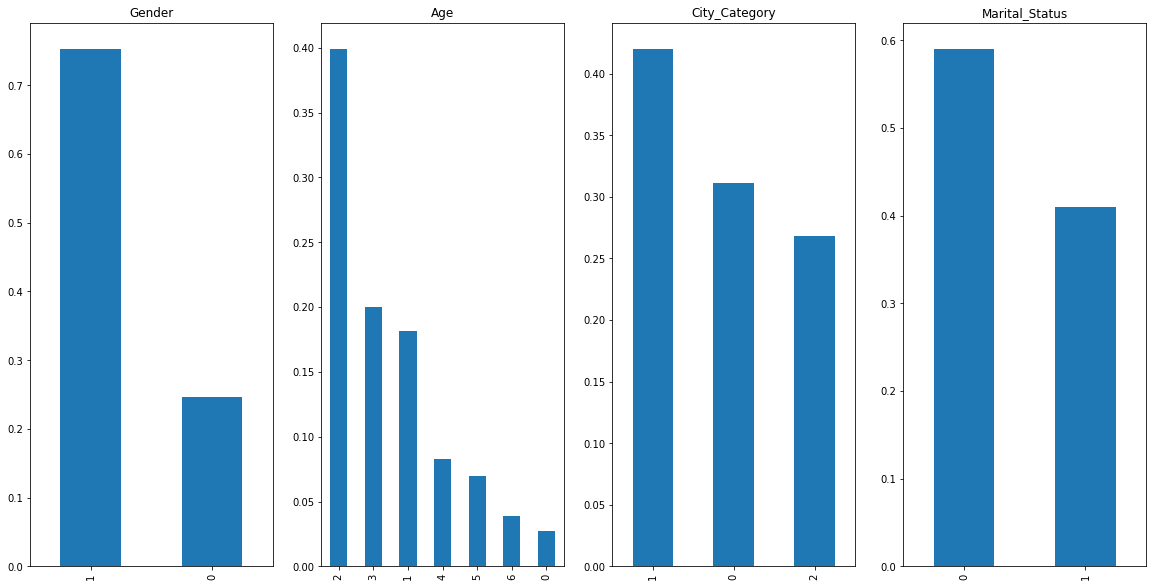

In [ ]:
plt.figure(1)
plt.subplot(141)
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Gender')
plt.subplot(142)
train['Age'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Age')
plt.subplot(143)
train['City_Category'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='City_Category')
plt.subplot(144)
train['Marital_Status'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Marital_Status')

observation :
1= On Black friday sale 75% are male and 25% are female are coming for shop.
2= maximum person are coming in age range of '26-35' around 40%.
3= maximum people are coming form city B.
4= maximum people are married arround 60%.

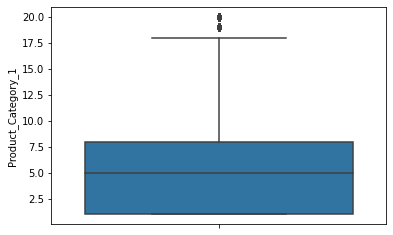

In [ ]:
sns.boxplot(y=train['Product_Category_1'])

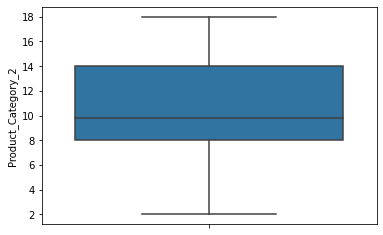

In [ ]:
sns.boxplot(y=train['Product_Category_2'])

# Bivariant analysis

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


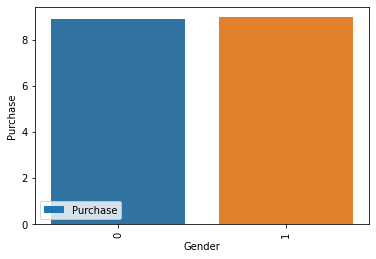

In [ ]:
train[['Gender','Purchase']].groupby('Gender').mean().plot.bar()
sns.barplot('Gender', 'Purchase', data = train)
plt.show()

It looks like that men tend to spend more on Black Friday although women are not far behind.



```
# Let's see how Age affects the Purchase. Of the top of my head I can say that people of higher age will tend to spen more as they would have more income. Let's see where this gets us.
```



/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


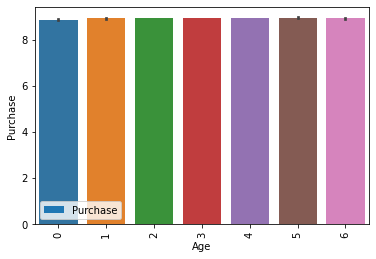

In [ ]:
train[['Age','Purchase']].groupby('Age').mean().plot.bar()
sns.barplot('Age', 'Purchase', data = train)
plt.show()



```
# I will also plot some boxplots to study the deviation in Age vs Purchase
```



/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


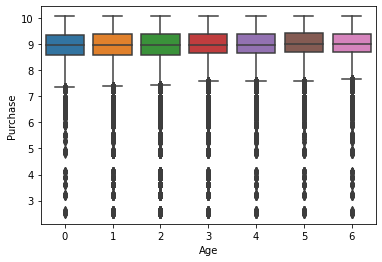

In [ ]:
sns.boxplot('Age','Purchase', data = train)
plt.show()



```
Not much of a deciation there. We can say that no matter what age group you belong to, you are gonna make full use of your purchasing power on a Black Friday. Maybe, because everything is so damn cheap
```



*Lets see how city category affects the purchase.*

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


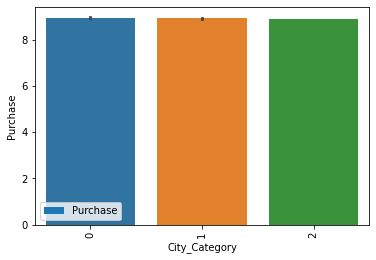

In [ ]:
train[['City_Category','Purchase']].groupby('City_Category').mean().plot.bar()
sns.barplot('City_Category', 'Purchase', data = train)
plt.show()

*`Okay so, the people belonging to category 0 tend to spend a little more. These may be the more developed cities that we are talking about here.`*

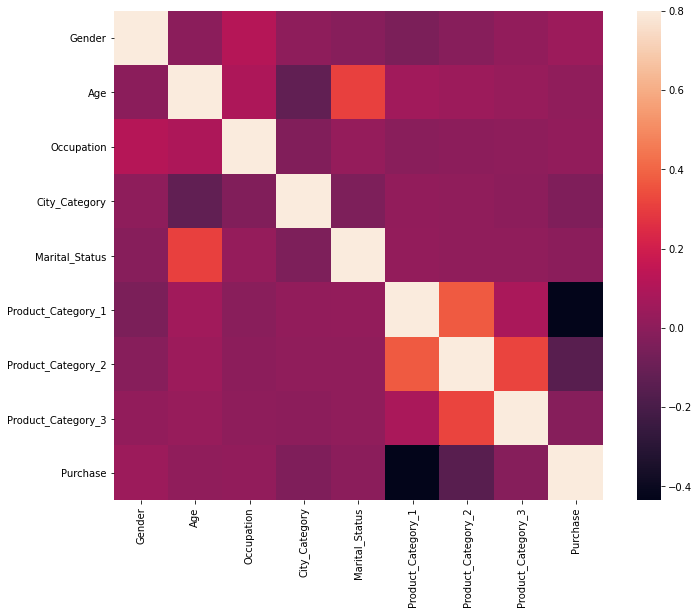

In [ ]:
corrmat = train.corr()
fig,ax = plt.subplots(figsize = (12,9))
sns.heatmap(corrmat, vmax=.8, square=True)



```
It can be seen that nothing is highly correlated with the Purchase variable. Although a few conclusions can be drawn:

Product_Category_1 has a negative correlation with Purchase.
Maritial_Status and Age are strongly correlated. As Expected.
Product_Category_3 has a strong correlation with Purchase. Maybe the products in this category were cheap. Let's chrun out some number related to this.
```



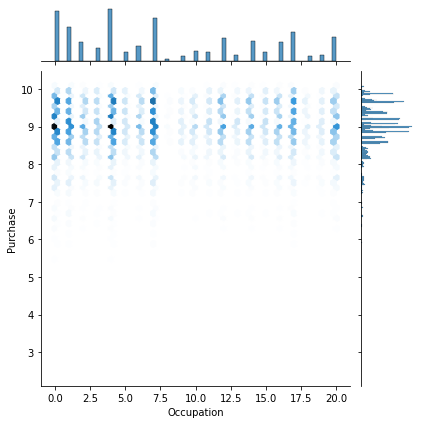

In [ ]:
sns.jointplot(x='Occupation',y='Purchase',
              data=train, kind='hex'
             )

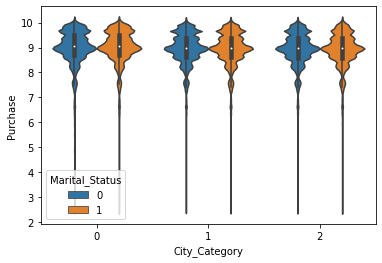

In [ ]:
sns.violinplot(x='City_Category',y='Purchase',hue='Marital_Status',
               data=train)

# Test-train spplit

In [ ]:
#Dividing the data into test and train datasets
X = train.iloc[:, 0:9].values
y = train.iloc[:, 9].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [ ]:
X_train

array([[1, 2, 4, ..., 1, 15.0, 16.0],
       [1, 2, 0, ..., 1, 8.0, 17.0],
       [1, 5, 1, ..., 5, 15.0, 12.668243206790512],
       ...,
       [0, 4, 15, ..., 5, 9.842329251122386, 12.668243206790512],
       [1, 1, 4, ..., 2, 4.0, 12.668243206790512],
       [1, 6, 17, ..., 8, 17.0, 12.668243206790512]], dtype=object)

#Train the algorithm 

In [ ]:
# import the regressor 
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_absolute_error


In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
 # create regressor object 
regressor = RandomForestRegressor(n_estimators = 50, random_state = 0)

In [ ]:
# fit the regressor with x and y data 
regressor.fit(X_train, y_train) 
y_pred = regressor.predict(X_test)


In [ ]:
y_pred=np.array(y_pred)

In [ ]:
y_test=np.array(y_test)

*Evaluating the Algorithm*

In [ ]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.2832926733652507
Mean Squared Error: 0.1474212296093603
Root Mean Squared Error: 0.38395472338462033


In [ ]:
pred_perchase=regressor.predict(test)
pred_perchase=np.array(pred_perchase)
pred_perchase=np.exp(pred_perchase)
pred_perchase

array([14058.20595698, 15696.49376709,   274.57207808, ...,
       13936.89046742,   238.7255532 ,   311.2891071 ])

In [ ]:
submission=pd.read_csv("/content/sample_submission_V9Inaty.csv")
test_df
                             

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...
233594,1006036,P00118942,F,26-35,15,B,4+,1,8,NaN,NaN
233595,1006036,P00254642,F,26-35,15,B,4+,1,5,8.0,NaN
233596,1006036,P00031842,F,26-35,15,B,4+,1,1,5.0,12.0
233597,1006037,P00124742,F,46-50,1,C,4+,0,10,16.0,NaN


In [ ]:

submission['pred_purchase']=pred_perchase


In [ ]:
submission.head()

,Purchase,User_ID,Product_ID,pred_purchase
0,100,1000004,P00128942,14058.205957
1,100,1000009,P00113442,15696.493767
2,100,1000010,P00288442,274.572078
3,100,1000010,P00145342,274.572078
4,100,1000011,P00053842,258.694666


In [ ]:
pd.DataFrame(submission).to_csv('Friday_sale_Final_prediction1.csv')